In [0]:
import pandas as pd
import numpy as np
import re
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
import sklearn.metrics as accuray_score
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1v23t6JYD3RfaEIpTa-BTfXrHnaglDt52'

In [134]:
fluff, id = link.split ('=') 

print (id)

1v23t6JYD3RfaEIpTa-BTfXrHnaglDt52


In [135]:
downloaded = drive.CreateFile ({'id': id}) 
downloaded.GetContentFile ('t_ml.csv') 
df3 = pd.read_csv ('t_ml.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Feature 1 event id**: Um sistema de identificação de eventos de 12 dígitos. Primeiros 8 números - data registrada “aaaammdd”. Últimos 4 números - número do caso seqüencial para o dia dado (0001, 0002 etc).


**Feature 2 iyear**: Ano

**Feature 3 imonth**: Mês

**Feature 4 iday**: Dia

**Feature 5 approxdate**: Um String para descrever a data. Obs(95% null)  

**Feature 6 extended**: Dado binario sobre a duração do ataque. 1 = "Sim" A duração de um incidente prolongou-se por mais de 24 horas. 0 = "Não" A duração de um incidente prolongou-se por menos de 24 horas.

**Feature 7 resolution**: Resolução do caso, mostrando datas . Obs(99% null)

**Feature 8 country**: Este campo identifica o código do país

**Feature 9 iday country_txt** :Este campo é o nome do País ou local. Obs (já que temos a indentificação do país podemos tirar esse campo)

**Feature 10 region**: Este campo identifica o código da região com base em 12 regiões

1 = North America

2 = Central America & Caribbean

3 = South America

4 = East Asia

5 = Southeast Asia

6 = 

8 =	Western Europe

9	 = Eastern Europe

10	= Middle East & North Africa

11 =	Sub-Saharan Africa

**Feature 11 region_text**: Este campo indentifica os nomes das 12 regiões. Obs(já que temos os códigos das regiãos podemos tira esse campo)

**Feature 12 provstate**: Região administrativa subnacional (no momento do evento). 

**Feature 13 city**: Cidades 

**Feature 14 latitudes**: latitude 

**Feature 15 longitude**: longitude

**Feature 16 specificity**: Esse campo se refere a especificidade. varia de 1 à 5

**Feature 17 vicinity**: 168.90 composto de 0 

**Feature 18 location**:  Localização.Obs(69% null)

**Feature 19 summary**: Descrição do evento.Obs(Como se trata de um texto descrevendo como foi o ataque possivelmente será descartado)

**Feature 20 crit1**: Esse campo não possui descrição, mas são dados binarios entre 0 e 1 
porém todos os lacunas  estão sendo ocupados com 1. 

**Feature 21 crit2**:Esse campo não possui descrição, mas são dados binarios entre 0 e 1 
porém todos os lacunas  estão sendo ocupados com 1.

**Feature 22 crit3**:Esse campo não possui descrição, mas são dados binarios entre 0 e 1 
porém quase todos os lacunas  estão sendo ocupados com 1.

**Feature 23 doubtterr**:Dados em sua maioria composto por zero.


**Feature 24 alternative**: Esse dados vou tirar, pelo motivo que é mais um campo unido com outro e o outro campo está 84% null.

**Feature 25 alternative_txt**:  Esse campos está 84% null.


**Feature 26 multiple**: Campo binario 

**Feature 27 success**:Campo binario sobre o sucesso de um ataque terrorista


**Feature 28 suicide**: Esse campo diz se o ataque foi suicida. 1 = "Sim" O incidente foi um ataque suicida. 0 = "Não" Não há indicação de que o incidente tenha sido um ataque suicida


**Feature 29 attacktype1**:  Esse campo indentifica o ataque através de um codigo. 


**Feature 30 attacktype1_txt**: Esse campo descre o tipo de ataque do attacktype1. Obs(esse campo pode ser excluido já que temos o cod)


**Feature 31 attacktype2**:Esse dados vou tirar, pelo motivo que é mais um campo unido com outro e o outro campo está 92% null.

**Feature 32 attacktype2_ txt**:Esse campos está 92% null.

**Feature 33 attacktype3**: Este campo não possui descrição e está 100% null.

**Feature 34 attacktype3_txt**:  Este campo não possui descrição e está 100% null.

**Feature 35 targtype1**:  Esse campo tem o codigo que representa o tipo de alvo.

**Feature 36 targtype1_txt**: Esse campo tem o que cada codigo do targtype1

**Feature 37 targsubtype1**:Esse campo tem o codigo que representa o subtipo de alvo.

**Feature 38 targsubtype1_txt**:Esse campo tem o que cada codigo do targsubtype1

**Feature 39 corp1**: Corp afetada.

**Feature 40 target1**: A pessoa específica, a construção, a instalação que foi segmentada e / ou vitimizada

**Feature 41 natlty1**: Codigo referente a nacionalidade do alvo que foi atacado 

**Feature 42 natlty1_txt** : A nacionalidade do alvo que foi atacado

**Feature 43 targtype2** :   Este campo não possui descrição e está 92% null.


**Feature 44 targtype2_txt** : Este campo não possui descrição e está 92% null.

**Feature 45 targsubtype2** : Este campo não possui descrição e está 94% null.

**Feature 46 targsubtype2_txt** : Este campo não possui descrição e está 94% null.

**Feature 47 corp2** : Este campo não possui descrição e está 94% null.

**Feature 48 target2**: Este campo não possui descrição e está 94% null.

**Feature 49 natity2** : Este campo não possui descrição e está 94% null.

**Feature 50 natity2_txt** : Este campo não possui descrição e está 94% null.

**Da feature 51 à 58 estão 99 % null**

**Feature 59 gname** : Nome do grupo que fez o atentado feature deve ser excluidar.

**Feature 60 gsubname**: Descrição do grupo reponsavel pelo atentado.

**Dar feature 61 à 69 dados com 100% de null ou sem a possibilidade de uso**

**Feature 70 nperps** : Quantos terrorista envolvidos.

**Dar feature 71 à 80 dados com 100% de null ou sem a possibilidade de uso**

**Feature 81 compclaim** :  Este campo não possui descrição e está 97% null.

**Feature 82 weaptype1** : codigo que vai de 1 a 13 para o tipo de arma utilizada.

**Feature 83 weaptype1_txt** :  Tipo geral de arma usada no incidente

**Feature 84 weapsubtype1** : codigo que vai de 1 a 31 para o subtipo de arma utilizada.

**Feature 85 weapsubtype1_txt**: subtipo geral de arma usada no incidente

**Feature 86 weapsubtype1_txt**

**Dar feature 87 à 98 dados com 100% de null ou sem a possibilidade de uso**

**Feature 99 nkill** : Numeros de mortos no atentado.

**Feature 100 nkillus** : Numeros de mortos americanos no atentado.

**Feature 101 nkillter** : Não possui descrição, mas acho que é numero de teroristas mortos.

**Feature 102 nwound** : Numero de vitimas não letais 

**Feature 103 nwoundus** : Numero de vitimas não letais americanos.

**Feature 104 nwoundte** : Não possui descrição, mas acho que é numero de teroristas feridos não letais.

**Feature 105 property**: Não possui descrição porém pelo nome dar para deduzir que é o numero de propriedades atingidas.

**Feature 106 property**:  codigo Valor estimado do danos em reais.

**Feature 107 property_txt**: Valor estimado do danos em reais.

**Feature 108 propvalue**: Valor do dano na proriedade.

**Feature 109 propcomment** Comentario sobre o dano na propriedade.

**Feature 110 ishostkid**:  Criança afetadas.

**Dar feature 111 à 135 dados com 100% de null ou sem a possibilidade de uso**









In [136]:
df = df3
vet = []
df.columns[0]

'eventid'

In [137]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [138]:
i = 0
c = 0
v = df.shape

colmns = np.arange(v[i])
for i in colmns:
  if(df[df.columns[i]].isnull().sum() > 150000 or re.search('_txt', df.columns[i])):
    vet.append(i)
    c = c + 1


IndexError: ignored

In [0]:
vet.append(0)
vet.append(11)
vet.append(12)
vet.append(18)
vet.append(58)
vet.append(108)


In [0]:
df3.drop(df3.columns[vet],axis=1, inplace=True)

In [141]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 52 columns):
iyear           181691 non-null int64
imonth          181691 non-null int64
iday            181691 non-null int64
extended        181691 non-null int64
country         181691 non-null int64
region          181691 non-null int64
latitude        177135 non-null float64
longitude       177134 non-null float64
specificity     181685 non-null float64
vicinity        181691 non-null int64
location        55495 non-null object
crit1           181691 non-null int64
crit2           181691 non-null int64
crit3           181691 non-null int64
doubtterr       181690 non-null float64
multiple        181690 non-null float64
success         181691 non-null int64
suicide         181691 non-null int64
attacktype1     181691 non-null int64
targtype1       181691 non-null int64
targsubtype1    171318 non-null float64
corp1           139141 non-null object
target1         181055 non-null object
n

In [0]:
v = []
v = [11,22,23,25,33,45,46,47,48]
df3.drop(['location','motive','corp1','dbsource','scite1','scite2','scite3','weapdetail','target1'],axis=1, inplace=True)

In [143]:
df3.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weapsubtype1', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'propvalue', 'ishostkid', 'ransom', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

In [0]:
df3 = df3.dropna(subset=['longitude'])

In [145]:
df3.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weapsubtype1', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'propvalue', 'ishostkid', 'ransom', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

In [0]:
cols = ['iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weapsubtype1', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'propvalue', 'ishostkid', 'ransom', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY']

In [0]:
inp = SimpleImputer(missing_values=np.nan, strategy ='most_frequent')

df1 = inp.fit_transform(df3)


In [148]:
df1

array([[ 1.970e+03,  7.000e+00,  2.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 1.970e+03,  0.000e+00,  0.000e+00, ...,  1.000e+00,  1.000e+00,
         1.000e+00],
       [ 1.970e+03,  1.000e+00,  0.000e+00, ..., -9.000e+00,  1.000e+00,
         1.000e+00],
       ...,
       [ 2.017e+03,  1.200e+01,  3.100e+01, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 2.017e+03,  1.200e+01,  3.100e+01, ..., -9.000e+00,  0.000e+00,
        -9.000e+00],
       [ 2.017e+03,  1.200e+01,  3.100e+01, ..., -9.000e+00,  0.000e+00,
        -9.000e+00]])

In [0]:
df_real = pd.DataFrame(df1, columns = cols)

In [150]:
df_real.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weapsubtype1', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'propvalue', 'ishostkid', 'ransom', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

In [151]:
df_real.isnull().sum()

iyear           0
imonth          0
iday            0
extended        0
country         0
region          0
latitude        0
longitude       0
specificity     0
vicinity        0
crit1           0
crit2           0
crit3           0
doubtterr       0
multiple        0
success         0
suicide         0
attacktype1     0
targtype1       0
targsubtype1    0
natlty1         0
guncertain1     0
individual      0
nperps          0
nperpcap        0
claimed         0
weaptype1       0
weapsubtype1    0
nkill           0
nkillus         0
nkillter        0
nwound          0
nwoundus        0
nwoundte        0
property        0
propextent      0
propvalue       0
ishostkid       0
ransom          0
INT_LOG         0
INT_IDEO        0
INT_MISC        0
INT_ANY         0
dtype: int64

In [0]:
cols = ['iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple','suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weapsubtype1', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'propvalue', 'ishostkid', 'ransom', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY','success']

In [0]:
df_real = df_real.reindex(columns= cols)

In [154]:
df_real.corr().style.background_gradient(cmap='RdYlGn', axis=None).set_precision(2)
 

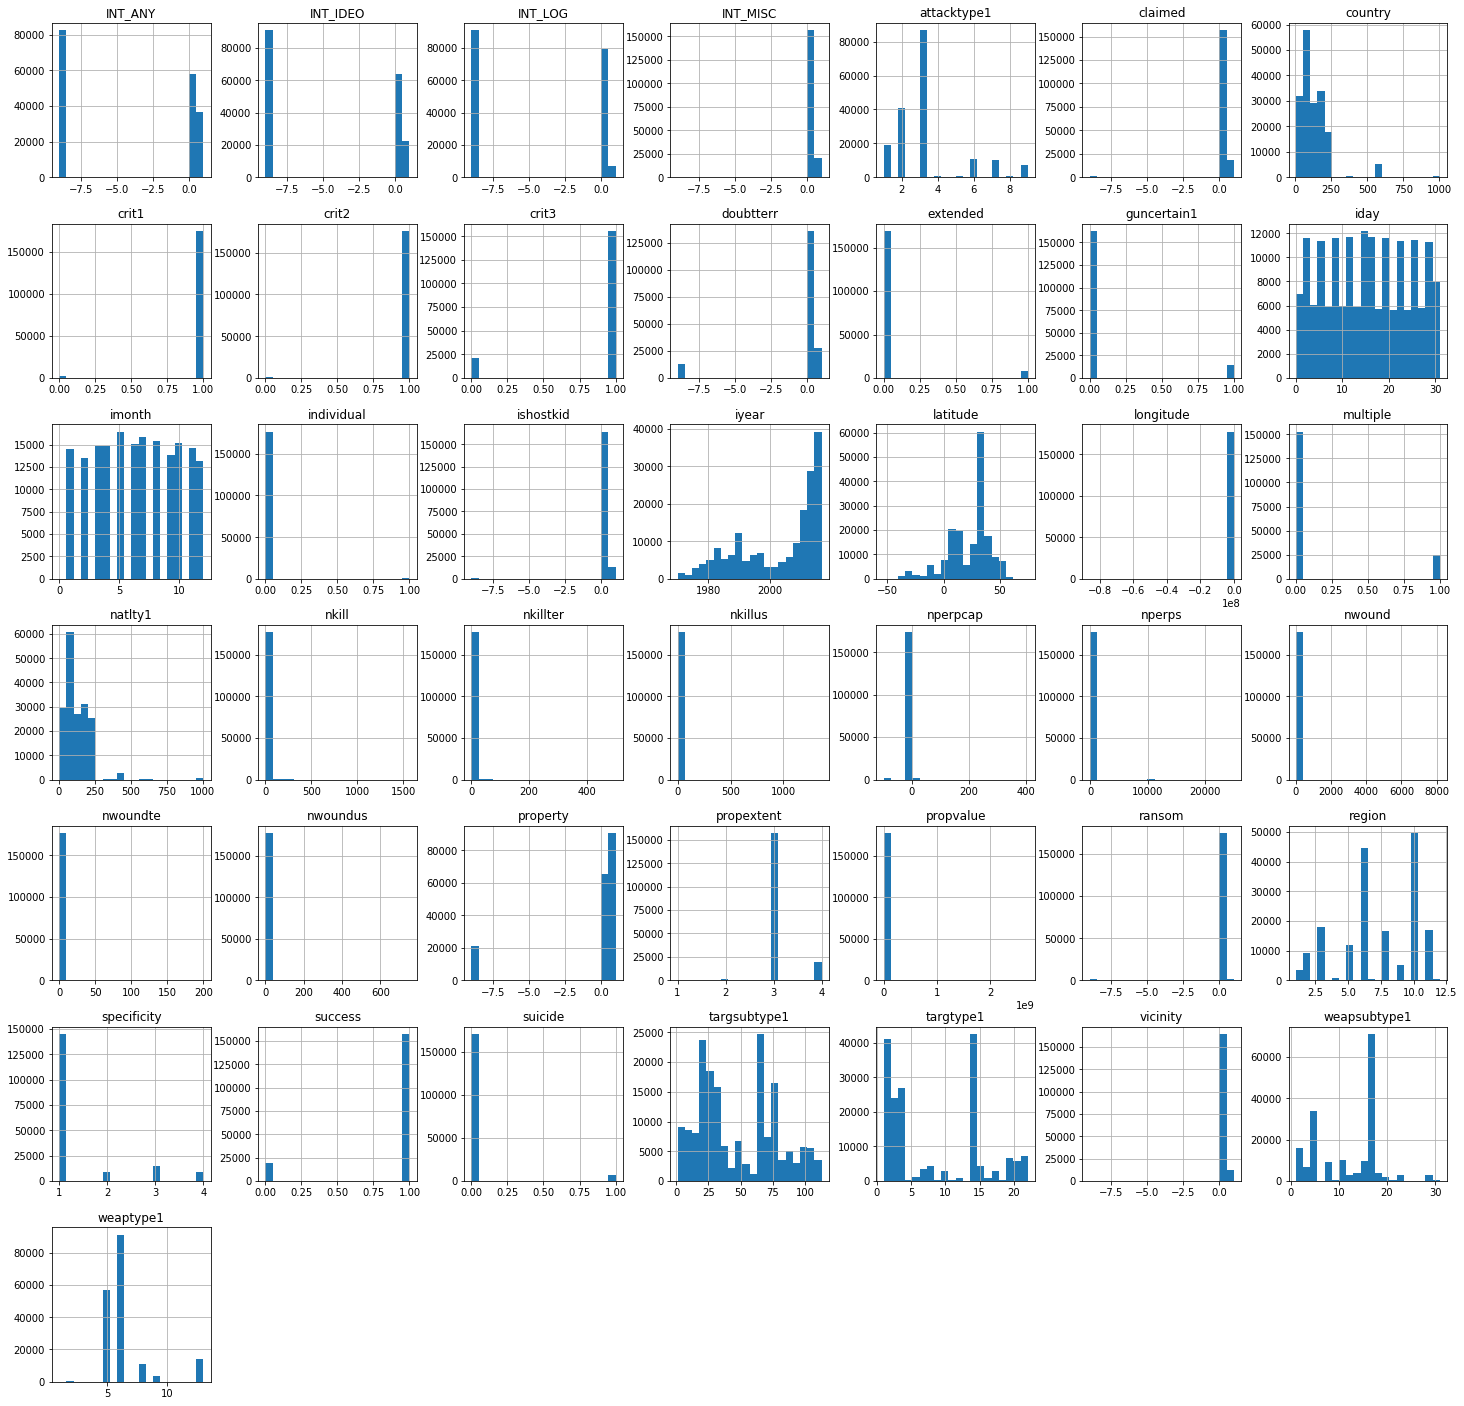

In [155]:
df_real.hist(bins = 20, figsize =(25,25));

In [0]:
df = df_real.values
np.random.seed(1)
np.random.shuffle(df)

In [157]:
X = df[:, :-1];
y = df[:,-1];
y

array([1., 1., 1., ..., 1., 1., 0.])

In [0]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)


In [159]:
Xs

array([[ 0.99061017,  1.04224096, -1.08054181, ...,  0.97067838,
        -0.16070393,  0.84838528],
       [-1.73441285, -1.02374611,  1.30351338, ...,  0.97067838,
        -0.16070393,  1.06133123],
       [ 0.83922   ,  0.15681793, -1.08054181, ..., -0.97003075,
        -0.16070393, -1.06812833],
       ...,
       [-0.82607184,  0.74709995, -0.62643606, ..., -0.97003075,
        -0.16070393, -1.06812833],
       [-1.9614981 ,  0.74709995, -0.28585674, ...,  0.97067838,
        -0.16070393,  0.84838528],
       [ 0.83922   , -0.43346409,  0.84940763, ..., -0.97003075,
        -0.16070393, -1.06812833]])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.3)

In [0]:
modelSGDC = SGDClassifier(random_state=42)
modelRF   = RandomForestClassifier(n_estimators=20, random_state=42)
modelKN   = KNeighborsClassifier()
modelBern = BernoulliNB()
modelGaus = GaussianNB()


In [162]:
modelSGDC.fit(X_train, y_train)
modelRF.fit(X_train, y_train)
modelKN.fit(X_train, y_train)
modelBern.fit(X_train, y_train)
modelGaus.fit(X_train, y_train)



GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:

predSGDC = modelSGDC.predict(X_test)
predRF = modelRF.predict(X_test)
predKN = modelKN.predict(X_test)
predBern = modelBern.predict(X_test)
predGaus = modelGaus.predict(X_test)

In [0]:
Data = {
     'Modelos' : ['ModelSGDC', 'ModelRF', 'ModelKN','ModelBern','ModelGaus'],
     'Accuracy' : [accuracy_score(y_test, predSGDC), accuracy_score(y_test, predRF), accuracy_score(y_test, predKN),accuracy_score(y_test, predBern),accuracy_score(y_test, predGaus)]
}

In [0]:
Results = pd.DataFrame(Data, columns=['Modelos','Accuracy'])

     

<BarContainer object of 5 artists>

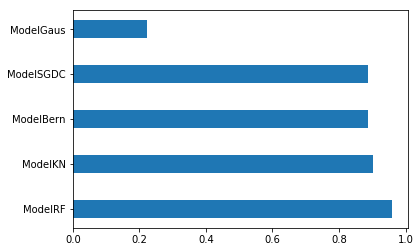

In [166]:
x = Results.sort_values(by='Accuracy',ascending=False).values
plt.barh(x[:,0],x[:,1],height=0.4,)

In [167]:
Results.sort_values(by='Accuracy',ascending=False)

,Modelos,Accuracy
1,ModelRF,0.958243
2,ModelKN,0.901639
3,ModelBern,0.887394
0,ModelSGDC,0.886773
4,ModelGaus,0.223613


In [0]:
pca = PCA(n_components= 15)

In [0]:
X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)

In [0]:
componentes = pca.explained_variance_ratio_

In [0]:
 modelRF_PCA = RandomForestClassifier(n_estimators=20, random_state=42)

In [172]:
modelRF_PCA.fit(X_trainPCA,y_train)
predRF_PCA = modelRF_PCA.predict(X_testPCA)
accuracy_score(y_test,predRF_PCA)


0.9126851207165841